In [277]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import requests
import pywikibot
import pywikibot.data.api as api

# Get data for each character

In [250]:
# Get character data from Data/MovieSummaries/character.metadata.tsv
character_data = pd.read_csv('Data/MovieSummaries/character.metadata.tsv', sep='\t', header=None)
character_data.columns = ['wiki_movie_ID','freebase_movie_ID','movie_release_date',\
    'character_name','actor_DOB','actor_gender','actor_height','actor_ethnicity',\
        'actor_name','actor_age_movie','freebase_char/actor_map_ID','freebase_char_ID','freebase_actor_ID']

# Drop all characters without a actor_gender
character_data = character_data.drop(character_data[character_data.actor_gender.isnull()].index)

character_data

,wiki_movie_ID,freebase_movie_ID,movie_release_date,character_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_movie,freebase_char/actor_map_ID,freebase_char_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd
450663,913762,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j


# Get data for each movie

In [251]:
# Open Data/Imdb/processed_imdb_dataset.csv as a dataframe
imdb_data = pd.read_csv('Data/Imdb/processed_imdb_dataset.csv', index_col=0)
imdb_data

,freebase_movie_ID,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,/m/03vyhn,tt0228333,movie,Ghosts of Mars,Ghosts of Mars,2001,98,"Action,Horror,Sci-Fi",4.9,55235
1,/m/0crgdbh,tt0094806,movie,Brun bitter,Brun bitter,1988,83,"Crime,Drama",5.7,40
2,/m/01mrr1,tt0083949,movie,A Woman in Flames,Die flambierte Frau,1983,106,Drama,6.0,589
3,/m/03cfc81,tt0002894,short,The Gangsters,The Gangsters,1913,35,"Comedy,Short",6.8,16
4,/m/02qc0j7,tt0029852,movie,Alexander's Ragtime Band,Alexander's Ragtime Band,1938,106,"Drama,Music,Musical",6.9,2159
...,...,...,...,...,...,...,...,...,...,...
46777,/m/03m6zh4,tt0109922,movie,Gopi Kishan,Gopi Kishan,1994,161,"Action,Comedy,Drama",5.8,913
46778,/m/06_vb43,tt0033660,movie,The Ghost Train,The Ghost Train,1941,85,"Comedy,Horror",6.2,1531
46779,/m/0j7hxnt,tt1816585,tvMovie,Mermaids: The Body Found,Mermaids: The Body Found,2011,82,Sci-Fi,4.6,1654
46780,/m/0g4pl34,tt1606259,movie,Knuckle,Knuckle,2011,97,"Biography,Documentary,Drama",6.8,3076


# Build a dataframe with:

- Freebase_movie_ID
- nb_character
- ratio_f_character
- rating
- votes

In [252]:
# Get all movie that appear in character_data variable
movie_list = character_data['freebase_movie_ID'].unique()

# Remove empty values from movie_list
movie_list = movie_list[~pd.isnull(movie_list)]

# Create a dataframe with all the movie ID
movie_character = pd.DataFrame({'freebase_movie_ID': movie_list})

# Merge the movie_character dataframe with the imdb_data dataframe and keep columns sum and rating
movie_character = pd.merge(movie_character, imdb_data[['freebase_movie_ID','numVotes','averageRating']], on='freebase_movie_ID', how='left')

# Drop all movies with no rating or votes
movie_character = movie_character.drop(movie_character[movie_character.numVotes.isnull()].index)
movie_character = movie_character.drop(movie_character[movie_character.averageRating.isnull()].index)

# Add column "nb_character" to movie_character with number of character per movie
character_per_movie = character_data.groupby('freebase_movie_ID').size().reset_index(name='nb_character')
movie_character = movie_character.merge(character_per_movie, on='freebase_movie_ID', how='left')

# Get number of character played by a female actor per movie
character_f_per_movie = character_data[character_data['actor_gender'] == 'F'].groupby('freebase_movie_ID').size().reset_index(name='f_character')
#character_m_per_movie = character_data[character_data['actor_gender'] == 'M'].groupby('freebase_movie_ID').size().reset_index(name='m_character')

# Add column "ratio_f_character" to movie_character with ratio of female character per movie
movie_character = movie_character.merge(character_f_per_movie, on='freebase_movie_ID', how='left')
#movie_character = movie_character.merge(character_m_per_movie, on='freebase_movie_ID', how='left')

# Change Nan values to 0
movie_character = movie_character.fillna(0)

# Add ratio column
movie_character["ratio"] = movie_character["f_character"] / movie_character["nb_character"]

# Keep 2 decimals
movie_character["ratio"] = movie_character["ratio"].round(2)

# Keep the movies in character_data that are in movie_character
character_data = character_data[character_data.freebase_movie_ID.isin(movie_character.freebase_movie_ID)]

movie_character



,freebase_movie_ID,numVotes,averageRating,nb_character,f_character,ratio
0,/m/03vyhn,55235.0,4.9,17,6.0,0.35
1,/m/0crgdbh,40.0,5.7,4,2.0,0.50
2,/m/01mrr1,589.0,6.0,3,1.0,0.33
3,/m/06yc6v,36604.0,7.2,14,8.0,0.57
4,/m/017n1p,272.0,5.4,2,1.0,0.50
...,...,...,...,...,...,...
38788,/m/04_0j2b,113.0,7.2,1,1.0,1.00
38789,/m/05zrrsp,68.0,6.0,11,5.0,0.45
38790,/m/0g9ts5h,515.0,5.0,12,5.0,0.42
38791,/m/02pygw1,101.0,5.8,2,0.0,0.00


# Clean character dataset

Remove the entries for which we do not have the movie data

Group by actor

In [253]:
character_data = character_data[character_data["freebase_movie_ID"].isin(movie_character.freebase_movie_ID)]

# Merge the character_data dataframe with the movie_character dataframe
working_data = pd.merge(character_data, movie_character, on='freebase_movie_ID', how='left')
# Drop columns that are not needed
working_data = working_data.drop(['wiki_movie_ID','movie_release_date','character_name','actor_DOB', 'actor_height', 'actor_ethnicity',\
     'actor_name', 'actor_age_movie', 'freebase_char/actor_map_ID', 'freebase_char_ID'], axis=1)

working_data


,freebase_movie_ID,actor_gender,freebase_actor_ID,numVotes,averageRating,nb_character,f_character,ratio
0,/m/03vyhn,F,/m/03wcfv7,55235.0,4.9,17,6.0,0.35
1,/m/03vyhn,F,/m/0346l4,55235.0,4.9,17,6.0,0.35
2,/m/03vyhn,M,/m/01vw26l,55235.0,4.9,17,6.0,0.35
3,/m/03vyhn,M,/m/034hyc,55235.0,4.9,17,6.0,0.35
4,/m/03vyhn,F,/m/01y9xg,55235.0,4.9,17,6.0,0.35
...,...,...,...,...,...,...,...,...
281679,/m/0g9ts5h,M,/m/0jxtsxh,515.0,5.0,12,5.0,0.42
281680,/m/0g9ts5h,F,/m/027dt0m,515.0,5.0,12,5.0,0.42
281681,/m/02pygw1,M,/m/03m6t5,101.0,5.8,2,0.0,0.00
281682,/m/02pygw1,M,/m/02qylb9,101.0,5.8,2,0.0,0.00


In [254]:
# groupby freebase_actor_ID
working_data = working_data.groupby('freebase_actor_ID').agg({'freebase_movie_ID': 'count', 'numVotes': 'mean', 'averageRating': 'mean', 'nb_character': 'mean', 'f_character': 'mean', 'ratio': 'mean'}).reset_index()

# Add actor_gender column
working_data = working_data.merge(character_data[['actor_gender', "freebase_actor_ID"]], on='freebase_actor_ID', how='left')

# Remove duplocates of freebase_actor_ID
working_data = working_data.drop_duplicates(subset='freebase_actor_ID', keep="first")
working_data = working_data.rename(columns={'freebase_movie_ID': 'nb_movies'})

# Round ratio to 2 decimals
working_data["ratio"] = working_data["ratio"].round(2)
working_data["numVotes"] = working_data["numVotes"].round(0)
working_data["averageRating"] = working_data["averageRating"].round(1)
working_data["nb_character"] = working_data["nb_character"].round(0)
working_data["f_character"] = working_data["f_character"].round(0)




# Comparison

Let's now compare the distribution of average rating and number of votes depending on the gender

In [255]:
# Divide the working_data dataframe into 2 dataframe based on the actor_gender
working_data_f = working_data[working_data.actor_gender == 'F']
working_data_m = working_data[working_data.actor_gender == 'M']

working_data_f

,freebase_actor_ID,nb_movies,numVotes,averageRating,nb_character,f_character,ratio,actor_gender
9,/m/010wx,1,429.0,5.9,4.0,2.0,0.50,F
82,/m/011_2h,1,866.0,6.0,14.0,6.0,0.43,F
83,/m/011_3s,28,19861.0,6.4,13.0,6.0,0.48,F
114,/m/011_c4,4,16631.0,7.0,10.0,4.0,0.44,F
224,/m/011k9b,1,44.0,7.6,4.0,4.0,1.00,F
...,...,...,...,...,...,...,...,...
281120,/m/0sw6y,37,20019.0,6.6,15.0,6.0,0.39,F
281157,/m/0sw7b,2,331153.0,7.3,39.0,15.0,0.38,F
281415,/m/0w_l,1,128.0,6.0,2.0,1.0,0.50,F
281417,/m/0x3b7,2,1931.0,7.5,10.0,4.0,0.40,F


# Do actresses feature in more movies than men?

Yes. Eventhough the repartition of number of movies featured in is very similar between men and women for <40~50 movies, there is only one women who featured in more than 90 movies (Bette Davis), compared to 24 men. 

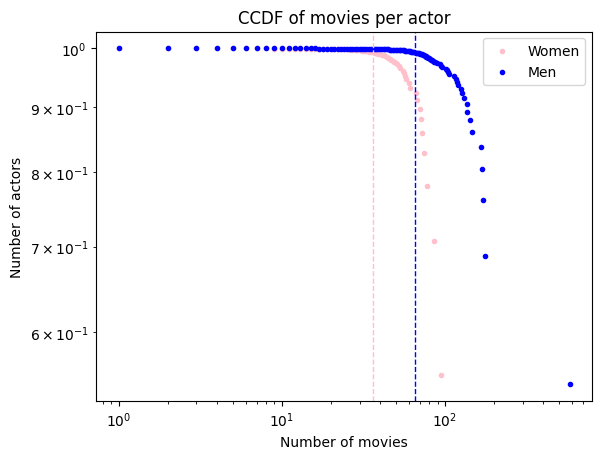

['Bette Davis']
24


In [274]:
working_data_f_movies = working_data_f.groupby('nb_movies').size()
working_data_m_movies = working_data_m.groupby('nb_movies').size()

working_data_f_movies = working_data_f_movies / working_data_f_movies.sum()
working_data_m_movies = working_data_m_movies / working_data_m_movies.sum()

# Plot number of movies distribution per gender
plt.scatter(working_data_f_movies.index, working_data_f_movies.cumsum()[::-1], label="Women", color='pink', marker = '.')
plt.scatter(working_data_m_movies.index, working_data_m_movies.cumsum()[::-1], label="Men", color='blue', marker = '.')

# Add vertical line at the mean
plt.axvline(working_data_m_movies.index.values.mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(working_data_f_movies.index.values.mean(), color='pink', linestyle='dashed', linewidth=1)
plt.title('CCDF of movies per actor')
plt.xlabel('Number of movies')
plt.ylabel('Number of actors')
plt.legend()
plt.loglog()
plt.show()

# Get actor name based on freebase_actor_ID
print(character_data[character_data.freebase_actor_ID ==\
     working_data_f[working_data_f.nb_movies > 90].freebase_actor_ID.values[0]].actor_name.unique())

# Number of actors who featured in more than 90 movies
print(working_data_m[working_data_m.nb_movies > 90].freebase_actor_ID.count())

# Is the average rating movies different depending on men/women?

Both distribution are bell curves with a mean of 6.1 and a std of 1.05

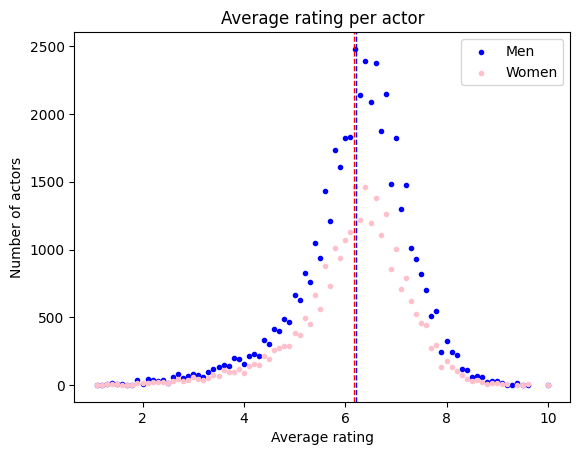

In [275]:
working_data_f_rating = working_data_f.groupby('averageRating').size()
working_data_m_rating = working_data_m.groupby('averageRating').size()

# Compute weighted average
m_avg = np.average(working_data_m_rating.index, weights=working_data_m_rating)
f_avg = np.average(working_data_f_rating.index, weights=working_data_f_rating)
# Compute weighted standard deviation
m_std = np.sqrt(np.average((working_data_m_rating.index - m_avg)**2, weights=working_data_m_rating))
f_std = np.sqrt(np.average((working_data_f_rating.index - f_avg)**2, weights=working_data_f_rating))

plt.scatter(working_data_m_rating.index, working_data_m_rating, color='blue', label = 'Men', marker=".")
plt.scatter(working_data_f_rating.index, working_data_f_rating, color='pink', label = 'Women', marker=".")

# Add vertical line at the mean
plt.axvline(m_avg, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(f_avg, color='red', linestyle='dashed', linewidth=1)
plt.title('Average rating per actor')
plt.xlabel('Average rating')
plt.ylabel('Number of actors')
plt.legend()
plt.show()


# Avec l'analyse d'Arthur: parmi tous les perso qui apparaissent dans les plot, quel est le pourcentage de femme.